In [31]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D
from neurodiffeq.networks import FCNN, SinActv, Resnet, Swish, MonomialNN
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,odeint
import torch
import torch.nn as nn
from neurodiffeq.generators import Generator1D
import math
from neurodiffeq.monitors import Monitor1D
import IPython

In [32]:
alpha0 = 2
alpha1 = 1
C0 = -alpha0/(alpha1)
C1 = 2
C2 = 3
C3 = 4
C4 = 5
gamma = 100

In [33]:
def ode_system(A, t):
    return [diff(A,t) + 4*A]
N = 1000000
t_start = 1.2046056046056046
t_end = 50
t = np.linspace(t_start, t_end, N)
U0 = 0.0000001
U0dash = 1

In [34]:
# Initial conditions
h = t[1]-t[0]

# Enter the definition of the set of ordinary differential equations
def ode(t,y,u):
  ode_1 = u
  ode_2 = -(u**2)/(2*y) + 5*u*(y-1/15)/(y*t) + (-12*y*gamma + t**2)*(y-1/3)/(2*y*gamma*(t**2))
  return np.array([ode_1,ode_2])

# RK4
y = np.empty(N); u = np.empty(N)

# t[0] = t_initial
y[0] = U0; u[0] = U0dash

for i in range(0,N-1,1):

  k11 = h*ode(t[i],y[i],u[i])[0]
  k12 = h*ode(t[i],y[i],u[i])[1]

  k21 = h*ode(t[i]+(h/2),y[i]+(k11/2),u[i]+(k12/2))[0]
  k22 = h*ode(t[i]+(h/2),y[i]+(k11/2),u[i]+(k12/2))[1]

  k31 = h*ode(t[i]+(h/2),y[i]+(k21/2),u[i]+(k22/2))[0]
  k32 = h*ode(t[i]+(h/2),y[i]+(k21/2),u[i]+(k22/2))[1]

  k41 = h*ode(t[i]+h,y[i]+k31,u[i]+k32)[0]
  k42 = h*ode(t[i]+h,y[i]+k31,u[i]+k32)[1]

  y[i+1] = y[i] + ((k11+2*k21+2*k31+k41)/6)
  u[i+1] = u[i] + ((k12+2*k22+2*k32+k42)/6)
  # t[i+1] = t[i] + h

In [35]:
B_rk4 = y

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
    
# Initial conditions

# Enter the definition of the set of ordinary differential equations
def f(t,A,Adash):
    ode = -(Adash**2)/(2*A) + 5*Adash*(A-1/15)/(A*t) + (-12*A*gamma + t**2)*(A-1/3)/(2*A*gamma*(t**2))
    return ode

# RK4
A = np.empty(N); Adash = np.empty(N)

# t[0] = t_initial
A[0] = U0; Adash[0] = U0dash

for i in range(0,N-1,1):
    Adashdash_i = f(t[i],A[i],Adash[i])
    Adashdash_i_plus_1 = f(t[i+1],A[i]+h*Adash[i],Adash[i]+h*Adashdash_i)

    Adash[i+1] = Adash[i] + 0.5*h*(Adashdash_i+Adashdash_i_plus_1)
    A[i+1] = A[i] + 0.5*h*(Adash[i] + Adash[i+1])



In [37]:
B_tp = A

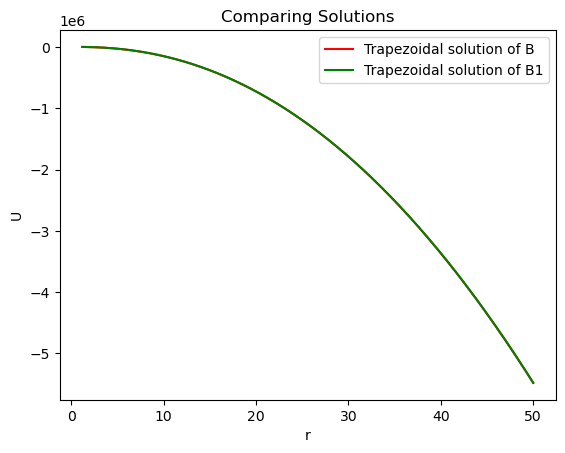

In [38]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
plt.plot(t, B_tp-t**2, label='Trapezoidal solution of B', color = 'r')
plt.plot(t, B_tp, label='Trapezoidal solution of B1', color = 'g')
# plt.plot(t, B_rk4,label='Rk4 solution of B', color = 'b')
plt.legend()
plt.savefig('lambda')
plt.show()

In [39]:
import copy

# Enter the definition of the set of ordinary differential equations
def f(t,A,Adash):
    ode = -(Adash**2)/(2*A) + 5*Adash*(A-1/15)/(A*t) + (-12*A*gamma + t**2)*(A-1/3)/(2*A*gamma*(t**2))
    return ode

# RK4
# B = A; Bdash = Adash

B = copy.deepcopy(A)
Bdash = copy.deepcopy(Adash)


for i in range(0,N-1,1):
    B[i+1] = B[i] + h*(1.5*Bdash[i] - 0.5*Bdash[i-1])
    Bdash[i+1] = Bdash[i] + h*(1.5*f(t[i],B[i],Bdash[i])-0.5*f(t[i-1],B[i-1],Bdash[i-1]))
    # B[i+3] = B[i+2] + h*(23*Bdash[i+2]/12 - 16*Bdash[i+1]/12 + 5*Bdash[i]/12)
    # Bdash[i+3] = Bdash[i+2] + h*(23*f(t[i+2],B[i+2],Bdash[i+2])/12 - 16*f(t[i+1],B[i+1],Bdash[i+1])/12 + 5*f(t[i],B[i],Bdash[i])/12)

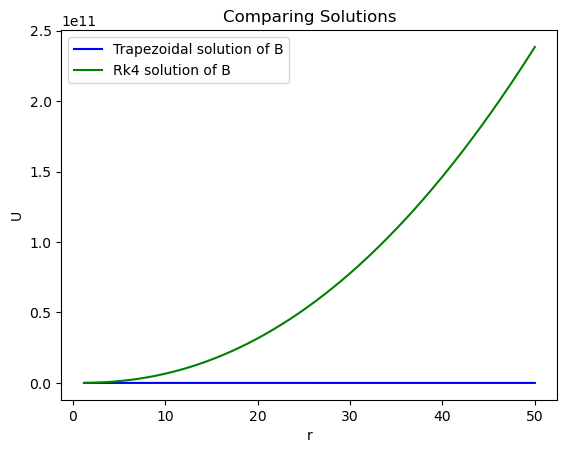

In [40]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
# plt.plot(t, B, label='multistep solution of B', color = 'r')
plt.plot(t, B_tp,label='Trapezoidal solution of B', color = 'b')
plt.plot(t, B_rk4,label='Rk4 solution of B', color = 'g')
plt.legend()
plt.savefig('lambda')
plt.show()

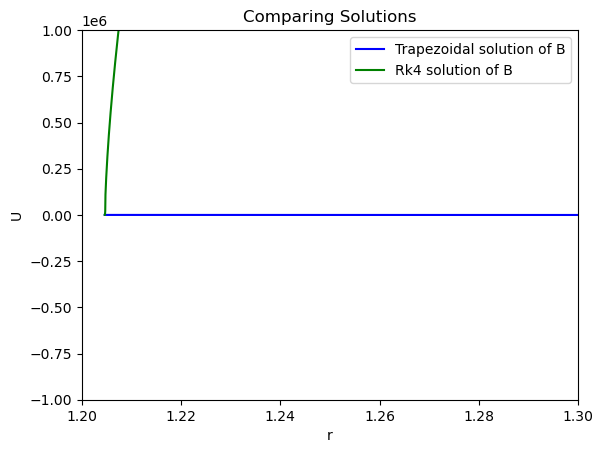

In [41]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
# plt.plot(t, B, label='multistep solution of B', color = 'r')
plt.plot(t, B_tp,label='Trapezoidal solution of B', color = 'b')
plt.plot(t, B_rk4,label='Rk4 solution of B', color = 'g')
plt.axis([1.20, 1.30, -1000000, 1000000])
plt.legend()
plt.savefig('lambda')
plt.show()

In [42]:
print(U0,U0dash,C0)

1e-07 1 -2.0


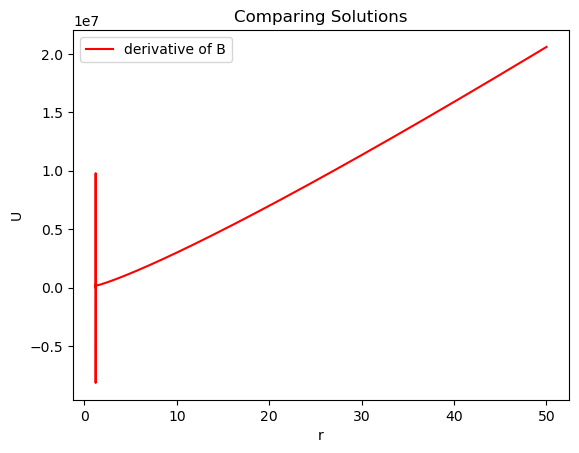

In [43]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
plt.plot(t, Bdash, label='derivative of B', color = 'r')
plt.legend()
plt.savefig('lambda')
plt.show()

In [44]:
index_min = min(range(len(B_tp)), key=B_tp.__getitem__)
print(index_min)
print(t[index_min])

999999
50.0


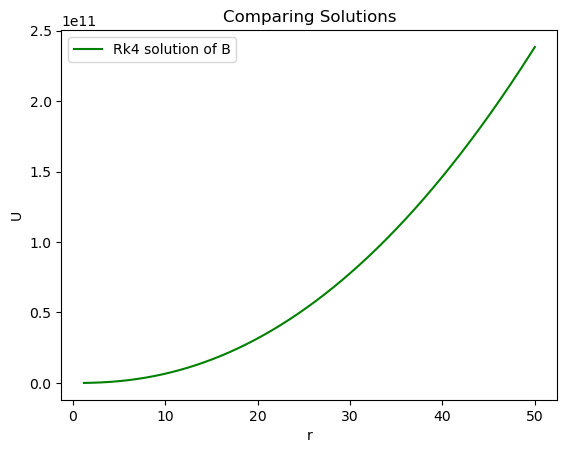

In [45]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
# plt.plot(t, B, label='multistep solution of B', color = 'r')
# plt.plot(t, B_tp,label='Trapezoidal solution of B', color = 'b')
plt.plot(t, B_rk4,label='Rk4 solution of B', color = 'g')
plt.legend()
plt.savefig('lambda')
plt.show()